In [18]:
import json
import pandas as pd

# Read the JSON file
# with open("results/experiment_results.json", "r") as f:
#     data = pd.read_json(f)

import glob
import os

# Get all task result files
task_files = glob.glob("results/examples-browser-use/experiment_results.json")

# Read each file into a list of dictionaries


In [37]:
results = []
for file in task_files:
    with open(file, "r") as f:
        data = json.load(f)
        results.extend(data["all_tasks"])  # Extract the tasks array directly

# Create DataFrame directly from the list of tasks
all_tasks = pd.DataFrame(results)

In [38]:
all_tasks = pd.DataFrame(list(data['all_tasks']))

print(all_tasks)
print(len(all_tasks))

                    task_id                           web_name  \
0  Cambridge Dictionary--29  https://dictionary.cambridge.org/   

                   start_time                    end_time  duration_seconds  \
0  2025-02-26 13:32:59.573541  2025-02-26 13:39:49.334486        409.760945   

   num_steps success                                        task_prompt  \
0         17  failed  Go to the Plus section of Cambridge Dictionary...   

        final_answer gpt_4v_res  
0  <NO FINAL ANSWER>             
1


In [39]:
# exclude impossible tasks
import json


with open("data/WebVoyagerImpossibleTasks.json", "r") as f:
    impossible_tasks = set(json.load(f))

all_tasks = all_tasks[~all_tasks["task_id"].isin(impossible_tasks)]
# all_tasks["group"] = all_tasks["task_id"].str.split("--").str[0]
len(all_tasks)

1

In [40]:
all_tasks["group"] = all_tasks["task_id"].str.split("--").str[0]
all_tasks["group"].value_counts()

group
Cambridge Dictionary    1
Name: count, dtype: int64

<Axes: >

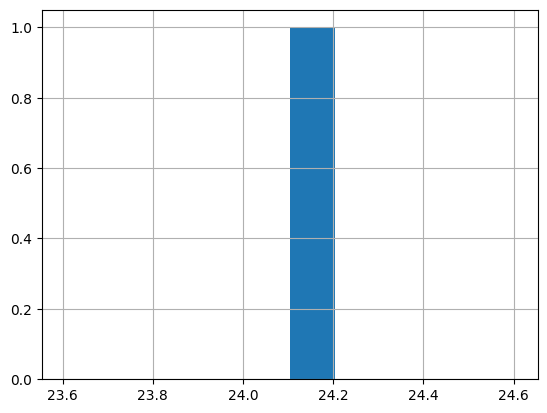

In [41]:
# average duration of tasks, average duration per step
# all_tasks["duration_seconds"].mean(), all_tasks["duration_seconds"].mean() / all_tasks["num_steps"].mean()

# histogram of duration PER STEP
(all_tasks["duration_seconds"] / all_tasks["num_steps"]).hist()

## Impossible tasks

Some tasks are impossible to solve. For Apple doesn't show prices for certain products in the dataset, there are no recipes for chocolate chip cookies etc.

A lot of tasks have dates in the past (kookings, flights), so we just changed the years from 2023 to 2024 or 2024 to 2025 respectively.

Here is a full list of impossible tasks:

In [42]:
impossible_tasks

{'Allrecipes--16',
 'Allrecipes--19',
 'Allrecipes--23',
 'Allrecipes--3',
 'Allrecipes--30',
 'Allrecipes--7',
 'Amazon--16',
 'Amazon--19',
 'Amazon--4',
 'Apple--1',
 'Apple--14',
 'Apple--16',
 'Apple--2',
 'Apple--20',
 'Apple--37',
 'Apple--41',
 'Apple--42',
 'Apple--7',
 'Apple--9',
 'ArXiv--11',
 'BBC News--14',
 'BBC News--16',
 'BBC News--18',
 'BBC News--2',
 'BBC News--21',
 'BBC News--33',
 'BBC News--37',
 'Booking--11',
 'Booking--13',
 'Booking--14',
 'Booking--6',
 'Coursera--17',
 'Coursera--28',
 'ESPN--19',
 'ESPN--2',
 'ESPN--21',
 'ESPN--26',
 'GitHub--22',
 'Google Flights--0',
 'Google Flights--20',
 'Google Flights--7',
 'Google Map--13',
 'Google Map--18',
 'Google Map--26',
 'Google Search--15',
 'Google Search--16',
 'Google Search--22',
 'Huggingface--1',
 'Huggingface--10',
 'Huggingface--20',
 'Huggingface--21',
 'Huggingface--22',
 'Huggingface--23',
 'Huggingface--32',
 'Huggingface--6'}

### Why tasks fail?

As you can see, most of the tasks fail because the model just can't figure out what to do. WHY?

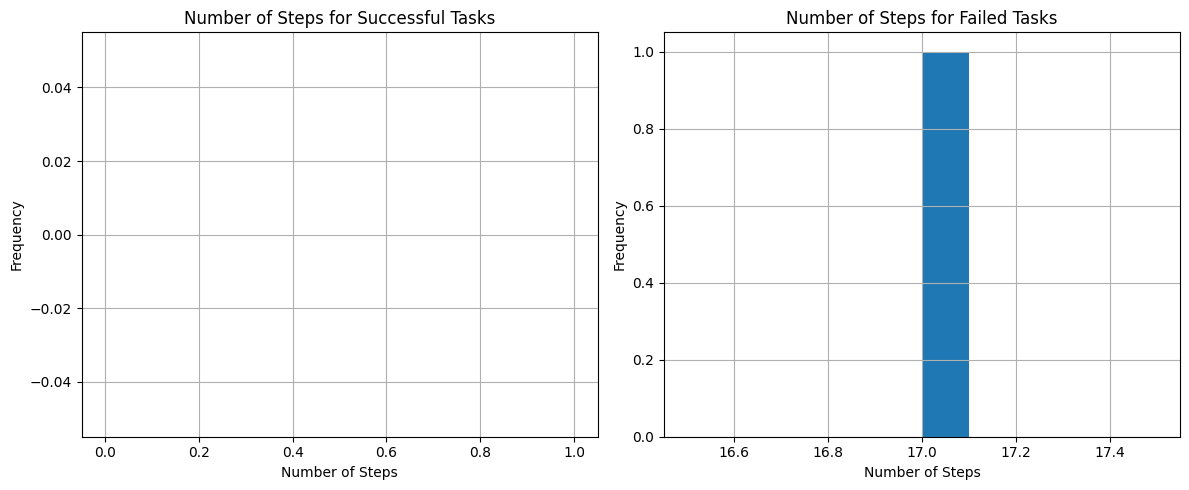

In [43]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for successful tasks
successful_tasks = all_tasks[all_tasks["success"] == 'success']
successful_tasks["num_steps"].hist(ax=ax1)
ax1.set_title("Number of Steps for Successful Tasks")
ax1.set_xlabel("Number of Steps")
ax1.set_ylabel("Frequency")

# Plot histogram for failed tasks
failed_tasks = all_tasks[all_tasks["success"] == 'failed']
failed_tasks["num_steps"].hist(ax=ax2)
ax2.set_title("Number of Steps for Failed Tasks") 
ax2.set_xlabel("Number of Steps")
ax2.set_ylabel("Frequency")

plt.tight_layout()

In [44]:
all_tasks["success"].value_counts(normalize=True)

success
failed    1.0
Name: proportion, dtype: float64

In [49]:
# percentage of tasks failed, unknown and success per each group (the thing before the -- in each task_id)
# Create group column if it doesn't exist
all_tasks["group"] = all_tasks["task_id"].str.split("--").str[0]

# Calculate percentage of each success status per group
# Calculate success percentages by group
success_by_group = all_tasks.groupby("group")["success"].value_counts(normalize=True).unstack().fillna(0)
success_by_group = success_by_group.round(2)

# Calculate average steps per group
avg_steps = all_tasks.groupby("group")["num_steps"].mean().round(1)
success_by_group["avg_steps"] = avg_steps

# Calculate number of tasks per group
num_tasks = all_tasks.groupby("group").size()
success_by_group["num_tasks"] = num_tasks

# Sort by success rate
success_by_group.sort_values("group", ascending=True)
# success_by_group.sort_values("success", ascending=False)
# success_by_group

success,failed,avg_steps,num_tasks
group,,,
Cambridge Dictionary,1.0,17.0,1
